<a href="https://colab.research.google.com/github/BiniyamAFirde/skills-introduction-to-github/blob/main/Cluster_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


In [ ]:

df = pd.read_csv('/content/standardized_dataset (2).csv')

# Features for clustering
features = df[['Fishing Fleet in unit (GT)',
                'Landings of Fishery Production in unit (TPW)',
                'Total Fishing Fleet Power in unit (KW)']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=1)
pca_result = pca.fit_transform(X_scaled)

# Add PCA result to the original DataFrame
df['PCA'] = pca_result

# Use the target feature
target_feature = df['Total Fishing fleet vessel count in unit(NR)']



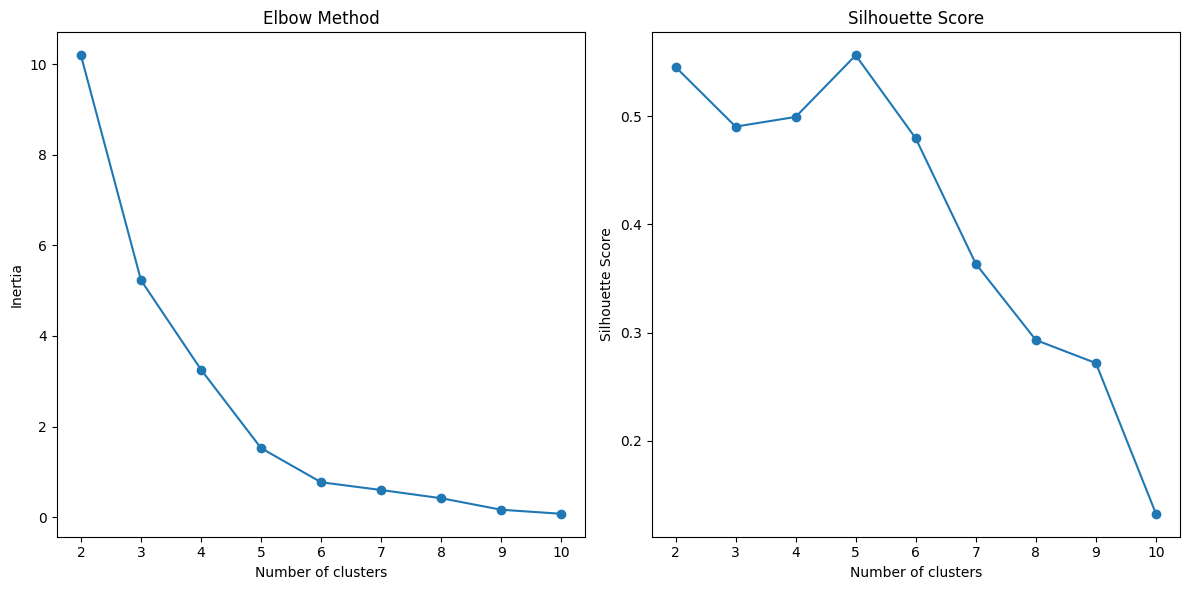

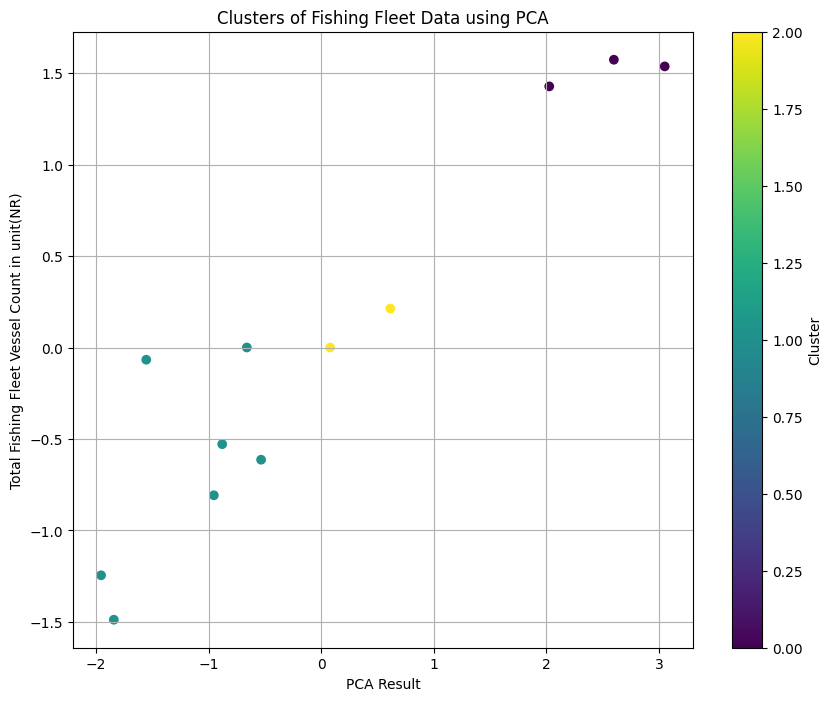

         PCA  Total Fishing fleet vessel count in unit(NR)  Cluster
0   0.079848                                      0.000000        2
1  -0.659942                                      0.000000        1
2   2.600448                                      1.573386        0
3   3.052066                                      1.536936        0
4   2.026378                                      1.427589        0
5   0.615077                                      0.212620        2
6  -0.533313                                     -0.613560        1
7  -0.878634                                     -0.528512        1
8  -1.553242                                     -0.066823        1
9  -0.953019                                     -0.807955        1
10 -1.954524                                     -1.245344        1
11 -1.841143                                     -1.488338        1


In [ ]:
# Determine using the Elbow Method
inertia = []
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))





# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


optimal_clusters = 3

kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(df[['PCA']])  # Use only PCA for clustering

df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA'], target_feature, c=df['Cluster'], cmap='viridis', label='Cluster')
plt.title('Clusters of Fishing Fleet Data using PCA')
plt.xlabel('PCA Result')
plt.ylabel('Total Fishing Fleet Vessel Count in unit(NR)')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Display
print(df[['PCA', 'Total Fishing fleet vessel count in unit(NR)', 'Cluster']])
